$$ mean(Energy) = sum(E_i * P_i) / N^2 $$
$$ variance = np.mean(Energy_i**2) - np.mean(Energy_i)**2 $$
$$ Specific.heat = variance/(kB*Temp^2) $$

In [2]:
import numpy as np

x = np.arange(0,10,1)
y = np.arange(0,10,1)

a = [-1,1]

lattice = []

for i in range(len(x)):
    lattice.append(np.random.choice(a,len(y)))

lattice = np.array(lattice)

print(lattice)

# Energy_i = - J * sum(Sj*Sk)

# variance = np.mean(Energy_i**2) - np.mean(Energy_i)**2

# Specific_heat = variance/(kB*Temp**2)

[[ 1 -1 -1  1 -1 -1 -1  1  1  1]
 [ 1  1 -1 -1  1  1  1  1 -1  1]
 [ 1 -1 -1  1 -1  1  1 -1  1 -1]
 [-1 -1 -1 -1  1  1 -1  1  1 -1]
 [ 1 -1  1  1 -1 -1 -1 -1  1 -1]
 [ 1  1  1  1 -1 -1  1 -1  1  1]
 [ 1  1 -1 -1  1 -1  1  1 -1  1]
 [ 1  1 -1 -1 -1 -1  1 -1 -1 -1]
 [ 1  1 -1 -1  1  1  1 -1  1  1]
 [ 1  1  1 -1 -1 -1 -1  1 -1 -1]]


In [3]:
# selecting a point randomly and calulating energy

r_n = np.arange(0,10,1)

# print(r_n)

index_i = np.random.choice(r_n)

index_j = np.random.choice(r_n)

print(index_i,index_j)

8 3


In [4]:
# calculating Energy of init config

Energy_o = lattice[index_i][index_j]*(np.array([lattice[index_i+1][index_j],lattice[index_i-1][index_j],lattice[index_i][index_j+1],lattice[index_i][index_j-1]]))

Energy_p = -1*Energy_o

# compare energies and acceptor rejector
Temp = 1.5
beta = 1/Temp
J = 0.5

Mod_Eo = J*(Energy_o.sum())
Mod_Ep = J*(Energy_p.sum())

print(Mod_Eo,Mod_Ep)

if Mod_Ep <= Mod_Eo:
    lattice[index_i][index_j] = -1*(lattice[index_i][index_j])
else:
    transition_prob = np.exp(-beta*abs(Mod_Ep-Mod_Eo))
    ran = np.random.random()
    if transition_prob > ran:
        lattice[index_i][index_j] = -1*(lattice[index_i][index_j])
    else:
        pass

print(lattice)

1.0 -1.0
[[ 1 -1 -1  1 -1 -1 -1  1  1  1]
 [ 1  1 -1 -1  1  1  1  1 -1  1]
 [ 1 -1 -1  1 -1  1  1 -1  1 -1]
 [-1 -1 -1 -1  1  1 -1  1  1 -1]
 [ 1 -1  1  1 -1 -1 -1 -1  1 -1]
 [ 1  1  1  1 -1 -1  1 -1  1  1]
 [ 1  1 -1 -1  1 -1  1  1 -1  1]
 [ 1  1 -1 -1 -1 -1  1 -1 -1 -1]
 [ 1  1 -1  1  1  1  1 -1  1  1]
 [ 1  1  1 -1 -1 -1 -1  1 -1 -1]]


## Metropolis Algo.

step1 - Init

1. Make N*N matrix
2. Sj refers to spin of $ j^th $ particle, it can have values +1 or -1 (but never 0)
3. Calculate E_i and M_i

step2 - Propose & implement change:

1. choose index to change
2. calculate E and M for proposed trial system
3. accept the change if trial energy is lowwer than the original energy, else set up boltzman probability wrt delta energy and have that be acceptance probability

step0 - Equilibration



In [8]:
import numpy as np

def Ising(J,N,Temp,Reps):
    x = np.arange(0,N,1)
    y = np.arange(0,N,1)

    a = [-1,1]

    lattice = []

    for i in range(len(x)):
        lattice.append(np.random.choice(a,len(y)))

    lattice = np.array(lattice)

    lat = lattice.copy()

    for _ in range(Reps):

        index_i = np.random.choice(x)
        index_j = np.random.choice(y)
        Energy_o = lattice[index_i][index_j]*(lattice[(index_i+1)%N][index_j]+lattice[index_i-1][index_j]+lattice[index_i][(index_j+1)%N]+lattice[index_i][index_j-1])
        Energy_p = -1*Energy_o

        try:
            beta = 1/Temp
        except ZeroDivisionError:
            beta = np.inf

        Mod_Eo = J*(Energy_o.sum())
        Mod_Ep = J*(Energy_p.sum())

        if Mod_Ep <= Mod_Eo:
            lattice[index_i][index_j] = -1*(lattice[index_i][index_j])
        else:
            transition_prob = np.exp(-beta*abs(Mod_Ep-Mod_Eo))
            ran = np.random.random()
            if transition_prob > ran:
                lattice[index_i][index_j] = -1*(lattice[index_i][index_j])
            else:
                pass

    return (lat,lattice)
    
lpve = Ising(J = 1, N = 1000, Temp = 0, Reps = 2000)
# lnve = Ising(J = -1, N = 10, Temp = 0, Reps = 2000)

def get_energy_of_lattice(lattice,J):
    N = len(lattice)
    En = 0
    for i in range(N):
        for j in range(N):
            En += lattice[i][j]*(lattice[(i+1)%N][j]+lattice[i-1][j]+lattice[i][(j+1)%N]+lattice[i][j-1])
    return J*En

# print('Energy of Lpve init:',get_energy_of_lattice(lpve[0],1))
print('Energy of Lpve final:',get_energy_of_lattice(lpve[1],1))
# print('Energy of Lnve init:',get_energy_of_lattice(lnve[0],-1))
# print('Energy of Lnve final:',get_energy_of_lattice(lnve[1],-1)) 

Energy of Lpve final: -5096


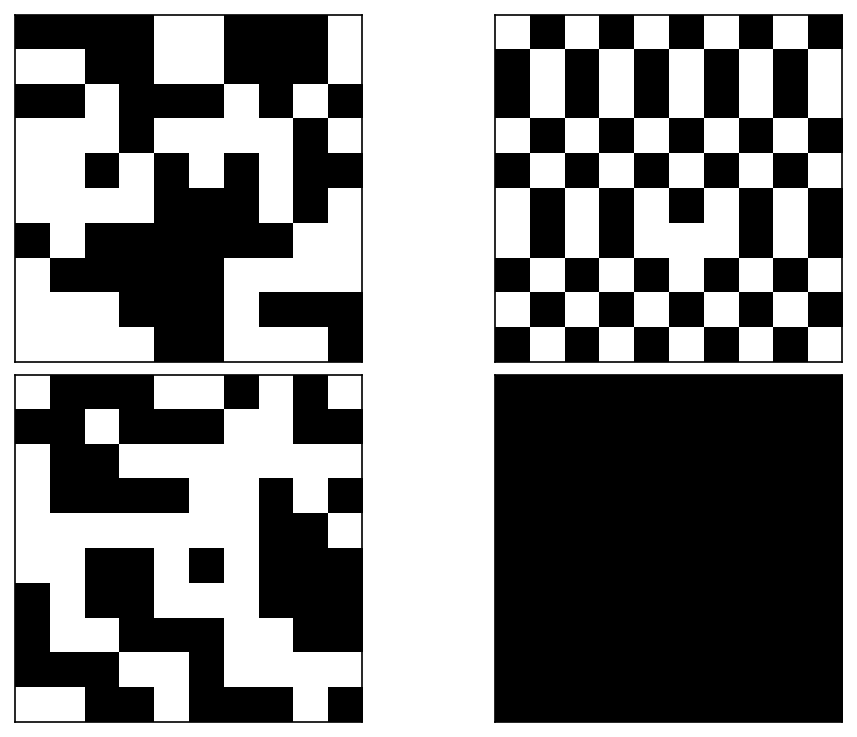

In [ ]:
import matplotlib.pyplot as plt

# print((l[0]==l[1]))

fig, ax = plt.subplots(2,2,dpi=150)
# fig.set_tight_layout(True)
fig.set_layout_engine('constrained')
ax[0,0].imshow(lpve[0],cmap='grey')
ax[0,0].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax[0,1].imshow(lpve[1],cmap='grey')
ax[0,1].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax[1,0].imshow(lnve[0],cmap='grey')
ax[1,0].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax[1,1].imshow(lnve[1],cmap='grey')
ax[1,1].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
plt.savefig('/Users/rijul/Desktop/All/MIT/TY/SemVI/CP3/Ising_model_heart')
plt.show()